<a href="https://colab.research.google.com/github/tomyaacov/process_mining/blob/main/ttt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pm4py==2.2.31

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.8 MB/s 
     |████████████████████████████████| 748 kB 49.1 MB/s 
     |████████████████████████████████| 40 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 2.6 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=c7e1a2aa9dc1315026e5765928c66d7f86a9fb915b9fed3f6cf07b0cf03c52c9
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for stringdist: filename=StringDist-1.0.9-cp38-cp38-linux_x86_64.whl size=24217 sha256=3ce55feb3456cfe8ebeeff9922b544bf9975aa21ebdf418dc7dc25ebdd5090e2
  Stored in directory: /root/.cache/pip/wheels/7a/64/e2/16f6a25a62a78f951c1715adb24ba2271ae9d7872f42378c3a
Successfully built pyvis stringdist


In [2]:
import pm4py
import pandas as pd
from itertools import product, permutations
from datetime import datetime
import graphviz


In [3]:
def data_to_log(data):
  df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
  for i, case in enumerate(data):
    for activity in case:
      df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
  dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
  return pm4py.convert_to_event_log(dataframe)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/tomyaacov/process_mining/main/ttt_log_df.csv")
dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

In [10]:
dataframe.head()

,case,activity,timestamp,case:concept:name,concept:name,time:timestamp,@@index
0,0,X4,2022-12-05 11:51:30.016872+00:00,0,X4,2022-12-05 11:51:30.016872+00:00,0
1,0,O2,2022-12-05 11:51:30.026004+00:00,0,O2,2022-12-05 11:51:30.026004+00:00,1
2,0,X5,2022-12-05 11:51:30.028854+00:00,0,X5,2022-12-05 11:51:30.028854+00:00,2
3,0,O7,2022-12-05 11:51:30.031665+00:00,0,O7,2022-12-05 11:51:30.031665+00:00,3
4,0,X6,2022-12-05 11:51:30.089761+00:00,0,X6,2022-12-05 11:51:30.089761+00:00,4


In [7]:
event_log

[{'attributes': {'concept:name': '0'}, 'events': [{'case': 0, 'activity': 'X4', 'timestamp': Timestamp('2022-12-05 11:51:30.016872+0000', tz='UTC'), 'concept:name': 'X4', 'time:timestamp': Timestamp('2022-12-05 11:51:30.016872+0000', tz='UTC'), '@@index': 0}, '..', {'case': 0, 'activity': 'X0', 'timestamp': Timestamp('2022-12-05 11:51:30.176595+0000', tz='UTC'), 'concept:name': 'X0', 'time:timestamp': Timestamp('2022-12-05 11:51:30.176595+0000', tz='UTC'), '@@index': 8}]}, '....', {'attributes': {'concept:name': '99999'}, 'events': [{'case': 99999, 'activity': 'X4', 'timestamp': Timestamp('2022-12-05 13:13:32.103346+0000', tz='UTC'), 'concept:name': 'X4', 'time:timestamp': Timestamp('2022-12-05 13:13:32.103346+0000', tz='UTC'), '@@index': 2106280}, '..', {'case': 99999, 'activity': 'O3', 'timestamp': Timestamp('2022-12-05 13:14:10.210367+0000', tz='UTC'), 'concept:name': 'O3', 'time:timestamp': Timestamp('2022-12-05 13:14:10.210367+0000', tz='UTC'), '@@index': 2106287}]}]

<ipython-input-11-102ebf98f405>:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  process_tree = pm4py.discover_tree_inductive(event_log)


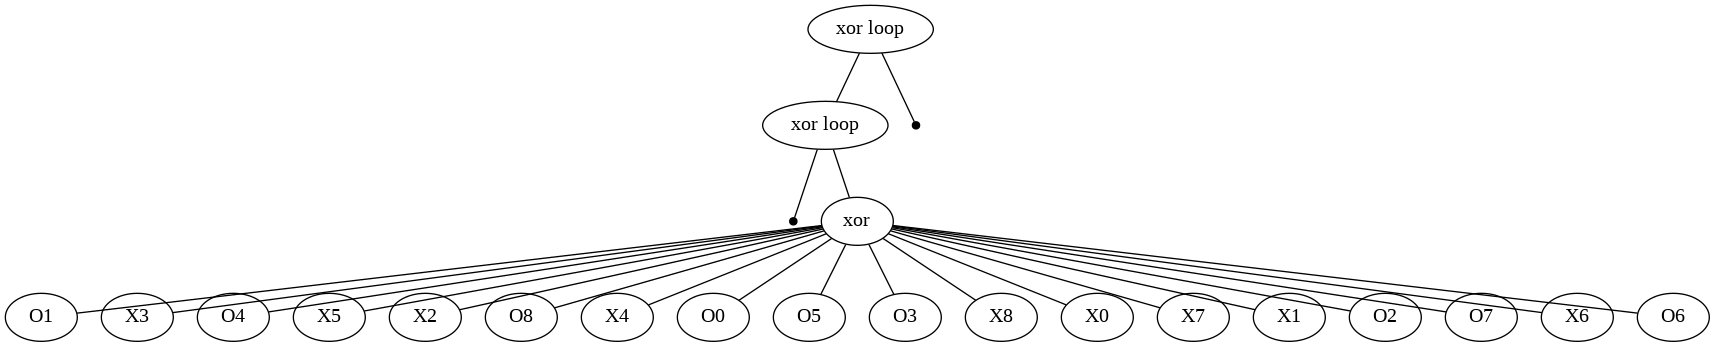

In [11]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

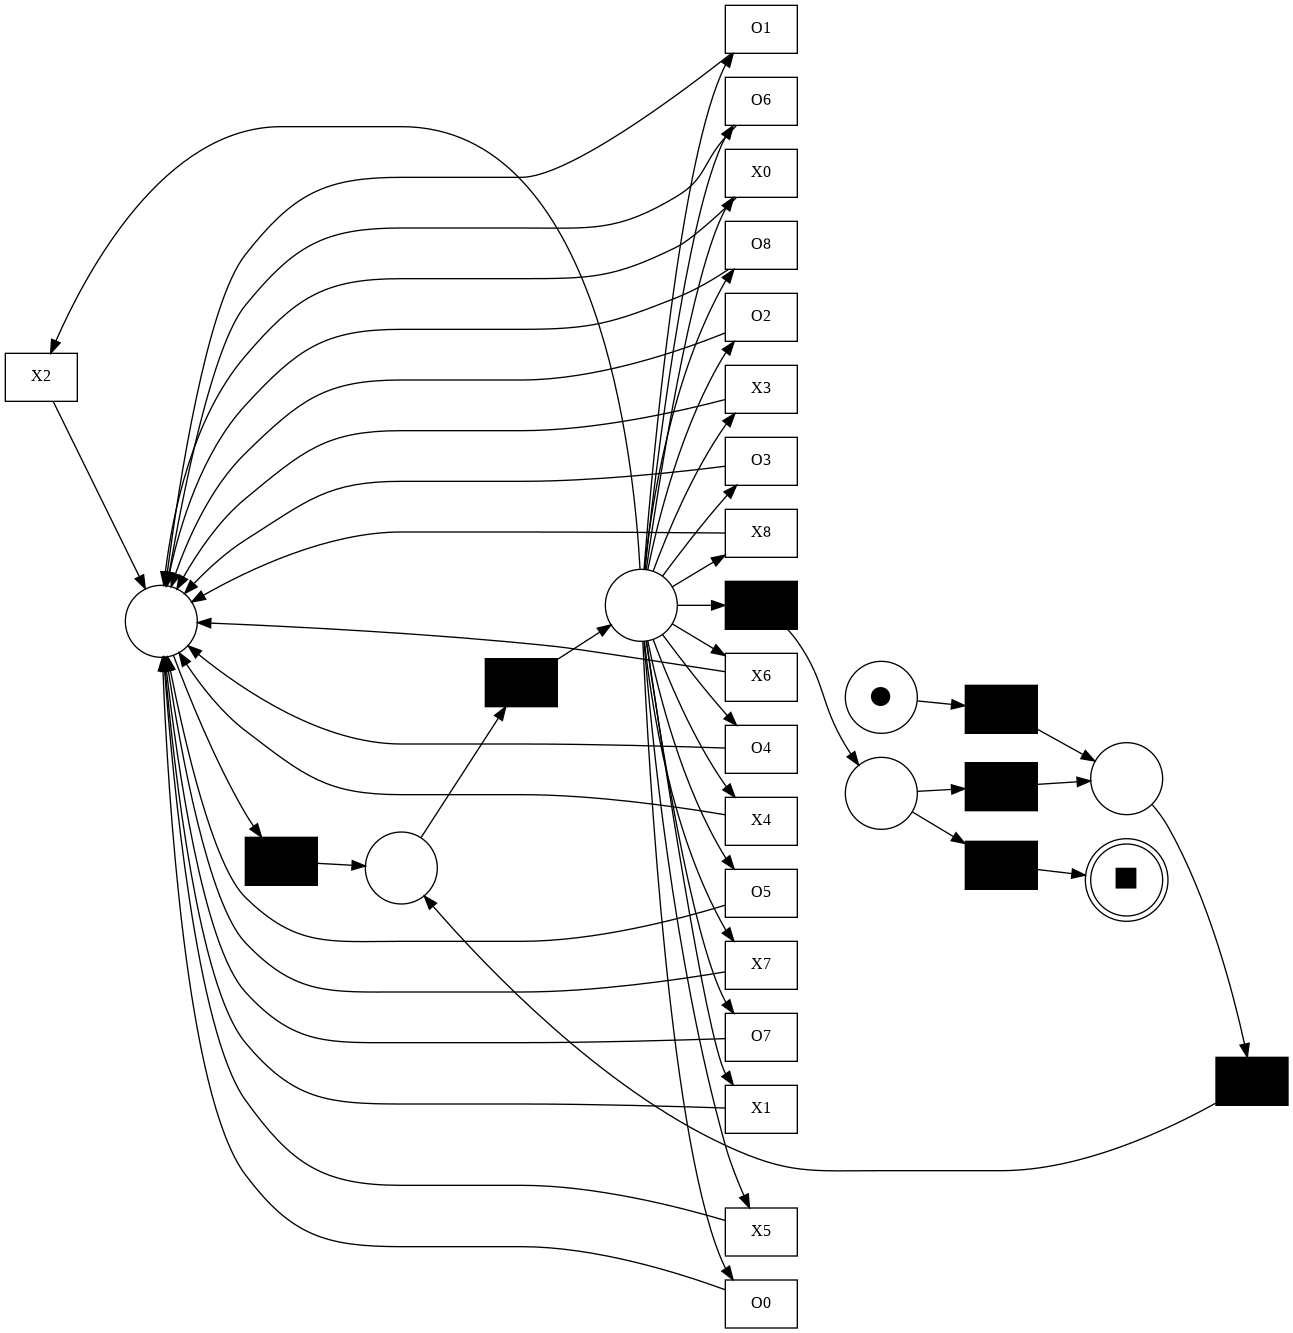

In [12]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/tomyaacov/process_mining/main/ttt_log_df.csv")
df["activity"] = df["activity"].map(lambda x: "X0,X1,X2" if x in ["X0","X1","X2"] else "-")
dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

In [28]:
df.head()

,case,activity,timestamp,case:concept:name,concept:name,time:timestamp
0,0,-,2022-12-05 11:51:30.016872+00:00,0,-,2022-12-05 11:51:30.016872+00:00
1,0,-,2022-12-05 11:51:30.026004+00:00,0,-,2022-12-05 11:51:30.026004+00:00
2,0,-,2022-12-05 11:51:30.028854+00:00,0,-,2022-12-05 11:51:30.028854+00:00
3,0,-,2022-12-05 11:51:30.031665+00:00,0,-,2022-12-05 11:51:30.031665+00:00
4,0,-,2022-12-05 11:51:30.089761+00:00,0,-,2022-12-05 11:51:30.089761+00:00


<ipython-input-29-102ebf98f405>:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  process_tree = pm4py.discover_tree_inductive(event_log)


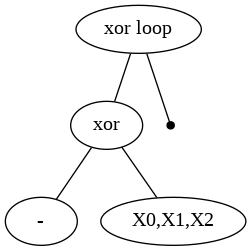

In [29]:
process_tree = pm4py.discover_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

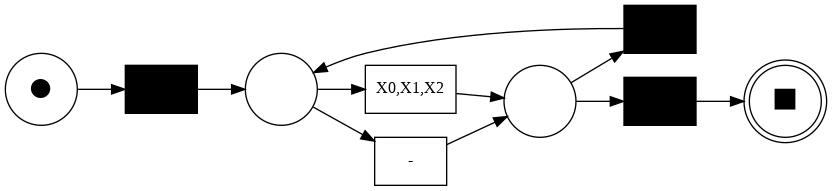

In [30]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)